In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf

data = np.loadtxt('datos_50.csv',skiprows=1,delimiter='	',unpack=True)
f,k,err_f,err_k = data

Se puede conseguir b por cuadrados mínimos al realizar el ajuste que corresponda y extraer a b como parámetro del mismo (o a partir de uno de ellos). Se verá luego cuál de los dos corresponde, pero en ambos casos este procedimiento aproxima b (y A) de la mejor manera posible para minimizar la suma de los residuos.

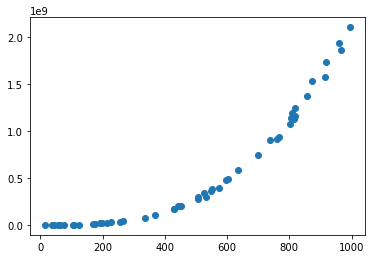

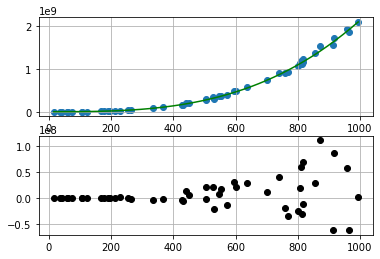

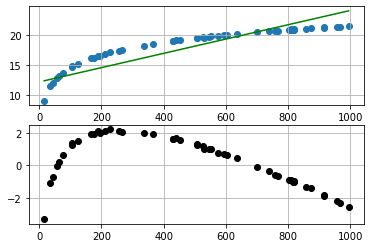

In [121]:
plt.scatter(k,f)
plt.show()

f = np.array(f)
k = np.array(k)
err_f = np.array(err_f)
err_k = np.array(err_k)

poly = lambda k,A,b : A*k**b
lin = lambda k,a,b : a*k+b

popt_p,cov_p = cf(poly,k,f,sigma=err_f,absolute_sigma=True)
popt_l,cov_l = cf(lin,k,np.log(f),sigma=err_f/f,absolute_sigma=True) # da valores muy grandes y python deja de funcionar, por lo que hace falta linealizar

x = np.linspace(min(k),max(k),200)

ax1 = plt.subplot(2,1,1)
plt.scatter(k,f)
plt.plot(x,poly(x,popt_p[0],popt_p[1]),'g')
plt.grid()

ax2 = plt.subplot(2,1,2, sharex=ax1)
plt.errorbar(k,f-poly(k,popt_p[0],popt_p[1]),fmt='ko')
plt.grid()
plt.show()

ax3 = plt.subplot(2,1,1)
plt.scatter(k,np.log(f))
plt.plot(x,lin(x,popt_l[0],popt_l[1]),'g')
plt.grid()

ax4 = plt.subplot(2,1,2, sharex=ax3)
plt.errorbar(k,np.log(f)-lin(k,popt_l[0],popt_l[1]),fmt='ko')
plt.grid()
plt.show()

Aquí se hace evidente, tanto visualmente como mirando los residuos, que el ajuste que corresponde es el polinómico, al acercarse mucho más a los puntos medidos y generar residuos relativos menores (y en ciertos puntos, menores también de manera absoluta incluso luego de linealizar el segundo caso).
A partir de esto, se ve que el ajuste que mejor 

In [122]:
fovrk = 0
fsimk = 0
kovrf = 0
sim_arr = []
for i in range(len(err_f)):
    if (err_f[i]/f[i])/(err_k[i]/k[i]) > 10:
        fovrk += 1
    elif (err_k[i]/k[i])/(err_f[i]/f[i]) > 10:
        kovrf += 1
    else:
        fsimk += 1
        sim_arr.append(i)

print(fovrk,fsimk,kovrf)
print(sim_arr)

0 2 48
[1, 18]


Estos resultados arrojan que el error relativo de k es al menos un orden de magnitud mayor al de f en todos los valores excepto en dos, donde son similares. Esto muestra que f corresponde a la variable independiente.

$(\frac{f}{A})^{1/b} = k$

Para linealizar, se toma el logaritmo de ambos lados, obteniendo

$ln((\frac{f}{A})^{1/b}) = ln(k)$

Que equivale a

$\frac{1}{b} \cdot ln(\frac{f}{A}) = ln(k)$

$\frac{1}{b} \cdot ln(f) - \frac{1}{b} ln(A) = ln(k)$

Entonces hay que hacer un ajuste lineal a partir de esta función, tomando al logaritmo natural de f como variable independiente y al de k como dependiente.

Esto hace necesario propagar el error de k a su logaritmo:

$\Delta ln(k) = |\frac{\partial ln(k)}{\partial k}| \Delta k$

$\Delta ln(k) = |\frac{1}{k}| \Delta k$

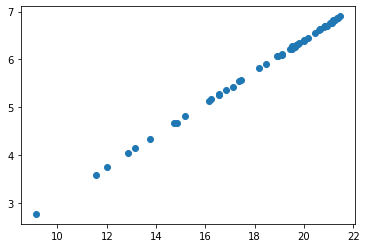

[[ 5.58685767e-05 -9.63663273e-04]
 [-9.63663273e-04  1.70893707e-02]]


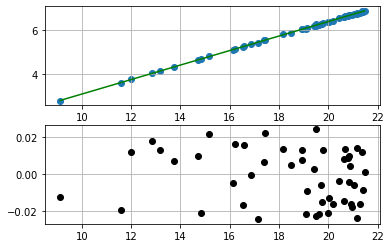

In [123]:
x = np.log(f)
y = np.log(k)

plt.scatter(x,y)
plt.show()

err_log_k = err_k/k

popt_fnl,cov_fnl = cf(lin,x,y,sigma=err_log_k,absolute_sigma=True)

print(cov_fnl)

a_adj,b_adj = popt_fnl
err_a_p = cov_fnl[0][0]

x_adj = np.linspace(min(x),max(x),200)
y_adj = lin(x_adj,a_adj,b_adj)

ax1 = plt.subplot(2,1,1)
plt.scatter(x,y)
plt.plot(x_adj,y_adj,'g')
plt.grid()

ax2 = plt.subplot(2,1,2, sharex=ax1)
plt.errorbar(x,y-lin(x,a_adj,b_adj),fmt='ko')
plt.grid()
plt.show()

Ya hecho el ajuste, lo restante es primero despejar b, fácilmente obtenible a partir de la pendiente (es su inversa). Luego, queda obtener el error a partir de la propagación del otorgado por Python.

$\Delta b = |\frac{\partial b}{\partial a_{p}}| \Delta a_{p}$

$\Delta b = |\frac{\partial \frac{1}{a_{p}}}{\partial a_{p}}| \Delta a_{p}$

$\Delta b = \frac{1}{a_{p}^2} \Delta a_{p}$

In [124]:
from math import floor
from IPython.display import Markdown as md

db = np.round(err_a_p/a_adj**2,6)
b = np.round(1/a_adj,6)

print('b = ' + str(b) + ' ± ' + str(db))

b = 3.000238 ± 0.000503
